## Stochastic Algorithm: Can you trust a bandit to execute an order ?

### 0. Description of the two-armed bandit algorithm and important results

### I. Bandit with dummy agent
In this section, we do not use real data nor agents. We test the two agents with randomly sampled probabilities, but still such that $p_A > p_B$ to match the theoritical results. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bandits import simple_two_armed_bandit

np.random.seed(1234)
pa = np.random.random_sample()
pb = (1 - pa) * np.random.random_sample() + pa

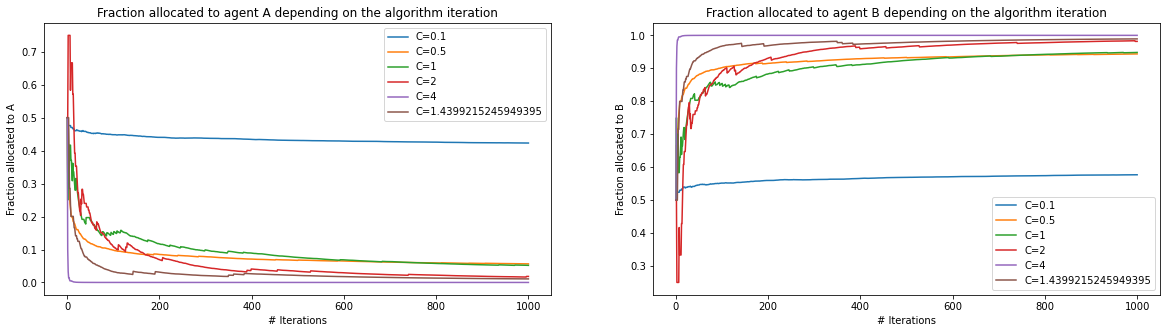

In [2]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

for c in [0.1, 0.5, 1, 2, 4, 1/pb]:
    X = 0.5  # initially, we weight each agent the same
    fracA, fracB = simple_two_armed_bandit(X, C=c, alpha=1, pa=pa, pb=pb)

    axs[0].plot(range(len(fracA)), fracA, label=f'C={c}')
    axs[0].set_xlabel('# Iterations')
    axs[0].set_ylabel('Fraction allocated to A')
    axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')
    axs[0].legend(loc='best')

    axs[1].plot(range(len(fracB)), fracB, label=f'C={c}')
    axs[1].set_xlabel('# Iterations')
    axs[1].set_ylabel('Fraction allocated to B')
    axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')
    axs[1].legend(loc='best')

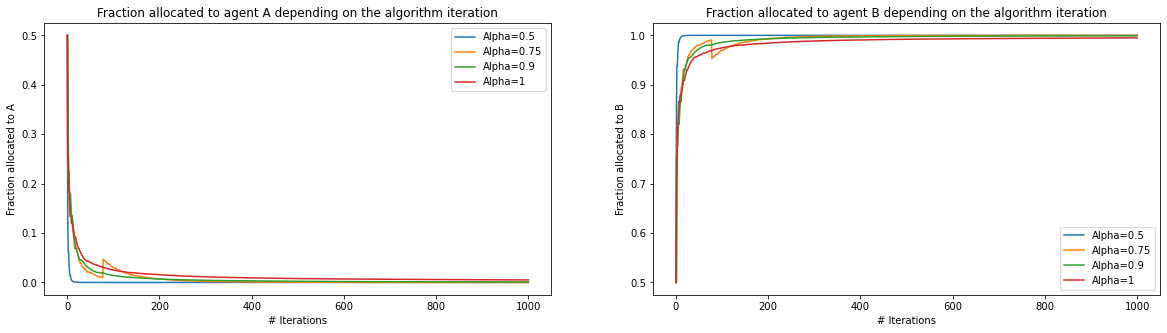

In [3]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

for a in [0.5, 0.75, 0.9, 1]:
    X = 0.5  # initially, we weight each agent the same
    fracA, fracB = simple_two_armed_bandit(X, C=1, alpha=a, pa=pa, pb=pb)

    axs[0].plot(range(len(fracA)), fracA, label=f'Alpha={a}')
    axs[0].set_xlabel('# Iterations')
    axs[0].set_ylabel('Fraction allocated to A')
    axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')
    axs[0].legend(loc='best')

    axs[1].plot(range(len(fracB)), fracB, label=f'Alpha={a}')
    axs[1].set_xlabel('# Iterations')
    axs[1].set_ylabel('Fraction allocated to B')
    axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')
    axs[1].legend(loc='best')

### II. Bandit with real data

In this section we use real financial data to experiment the two armed bandit algorithm with real trading agents. We implemented very simple trading agent: Random, Exponential Moving Average, and PW (following the trend by counting the increment or decrement streaks).  

The data we used is the stock price of Google in 2011, the series was resampled and averaged every two hours to limit the amount of data. In the end we habe 973 data points. First let us have a look at the data

In [1]:
# Import of libraries 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tests import test_pnl_increase
from agents import RandomAgent, ExpAvgAgent, PwAgent
from bandits import agent_two_armed_bandit

,AskPrice,BidPrice,MidPrice,AskQty,BidQty
Time,,,,,
2011-01-03 08:00:00,601.727421,601.279442,601.503431,336.446701,244.873096
2011-01-03 10:00:00,602.858438,602.595471,602.726955,332.794830,219.816909
2011-01-03 12:00:00,604.518561,604.335554,604.427058,309.168443,239.658849
2011-01-03 14:00:00,603.705293,603.517836,603.611565,345.139814,249.667111
2011-01-04 08:00:00,604.859430,604.619650,604.739540,222.355106,253.633855
...,...,...,...,...,...
2011-12-29 14:00:00,641.786011,641.602875,641.694443,210.909091,187.727273
2011-12-30 08:00:00,643.958489,643.614290,643.786390,329.909366,145.619335
2011-12-30 10:00:00,644.976757,644.721257,644.849007,210.857143,153.428571


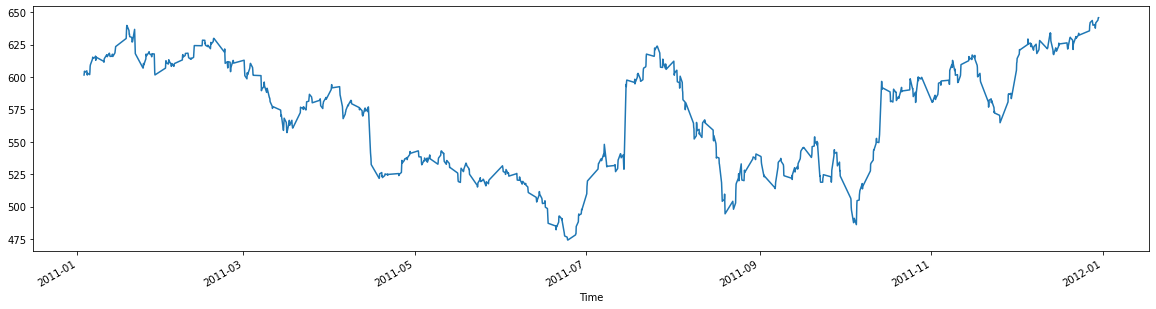

In [2]:
data = pd.read_hdf('data/resampled_google.h5')
data['MidPrice'].plot(figsize=(20,5))
data

Now we compare the agent between them and see how the bandit reacts: First we compare Random vs Random, then EMA vs EMA and finally PW vs PW. we Discuss the results obtained at the end of the section.

Text(0.5, 1.0, 'Fraction allocated to agent B depending on the algorithm iteration')

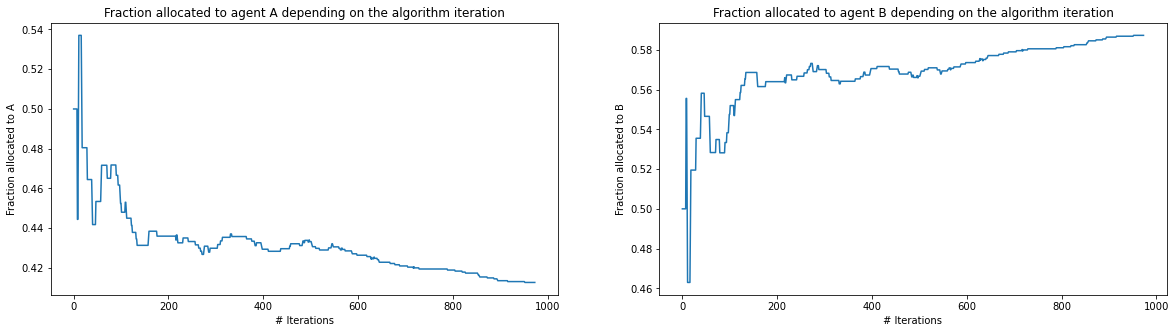

In [11]:
X = 0.5  # initially, we weight each agent the same
agentA = RandomAgent(50000, p_buy=0.5, p_sell=0.5)  # random impatitent
agentB = RandomAgent(50000, p_buy=0.3, p_sell=0.3)

fracA, fracB = agent_two_armed_bandit(data, agentA, agentB, X, C=1, alpha=1)

fig, axs = plt.subplots(1,2, figsize=(20,5))

axs[0].plot(range(len(fracA)), fracA)
axs[0].set_xlabel('# Iterations')
axs[0].set_ylabel('Fraction allocated to A')
axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')

axs[1].plot(range(len(fracB)), fracB)
axs[1].set_xlabel('# Iterations')
axs[1].set_ylabel('Fraction allocated to B')
axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')

Text(0.5, 1.0, 'Fraction allocated to agent B depending on the algorithm iteration')

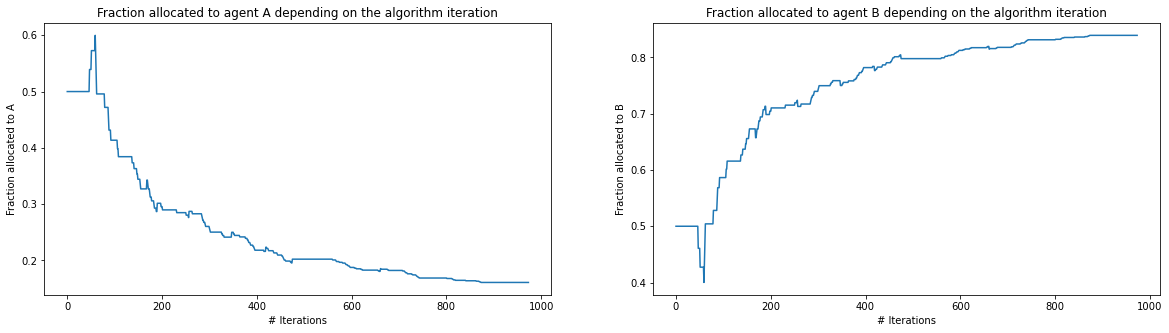

In [12]:
X = 0.5  # initially, we weight each agent the same
agentA = ExpAvgAgent(50000, alpha=0.5)
agentB = ExpAvgAgent(50000, alpha=0.9)

fracA, fracB = agent_two_armed_bandit(data, agentA, agentB, X, C=4, alpha=1)

fig, axs = plt.subplots(1,2, figsize=(20,5))

axs[0].plot(range(len(fracA)), fracA)
axs[0].set_xlabel('# Iterations')
axs[0].set_ylabel('Fraction allocated to A')
axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')

axs[1].plot(range(len(fracB)), fracB)
axs[1].set_xlabel('# Iterations')
axs[1].set_ylabel('Fraction allocated to B')
axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')

Text(0.5, 1.0, 'Fraction allocated to agent B depending on the algorithm iteration')

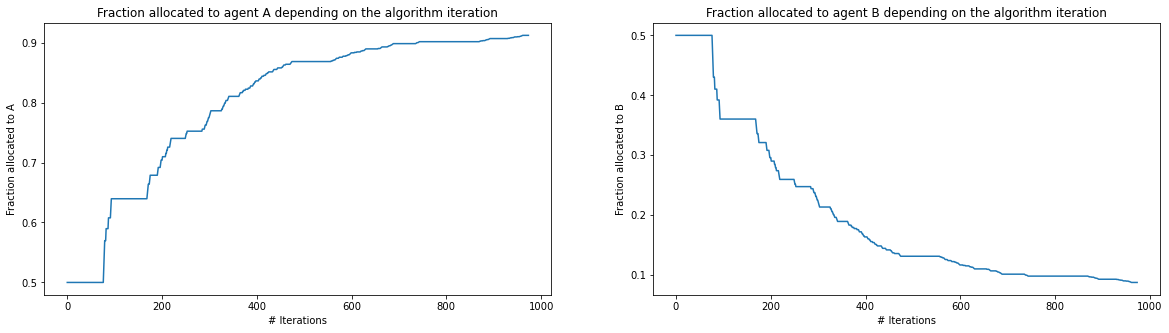

In [14]:
X = 0.5  # initially, we weight each agent the same
agentA = PwAgent(50000, streak=5)
agentB = PwAgent(50000, streak=10)

fracA, fracB = agent_two_armed_bandit(data, agentA, agentB, X, C=4, alpha=1)

fig, axs = plt.subplots(1,2, figsize=(20,5))

axs[0].plot(range(len(fracA)), fracA)
axs[0].set_xlabel('# Iterations')
axs[0].set_ylabel('Fraction allocated to A')
axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')

axs[1].plot(range(len(fracB)), fracB)
axs[1].set_xlabel('# Iterations')
axs[1].set_ylabel('Fraction allocated to B')
axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')

In [5]:
na, nb = 0, 0

agentA = PwAgent(50000, streak=5)
agentB = ExpAvgAgent(50000, alpha=0.9)
for n in range(973):
        ask, bid = data.iloc[n][['AskPrice', 'BidPrice']]
        agentA.act(ask, bid)
        agentB.act(ask, bid)
        agentA.calc_pnl(bid)
        agentB.calc_pnl(bid)
        if test_pnl_increase(agentA):
                na += 1
        if test_pnl_increase(agentB):
                nb += 1

print('Estimated p_A: ', na/973)
print('Estimated p_B: ', nb/973)


Estimated p_A:  0.19835560123329907
Estimated p_B:  0.1685508735868448


### III. Extension: what happends with n agents ?

In [9]:
from bandits import simple_multi_armed_bandit, agent_multi_armed_bandit

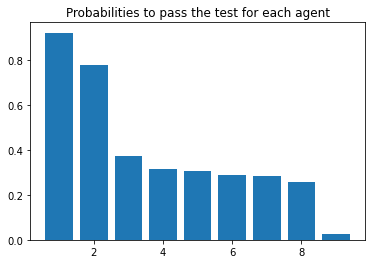

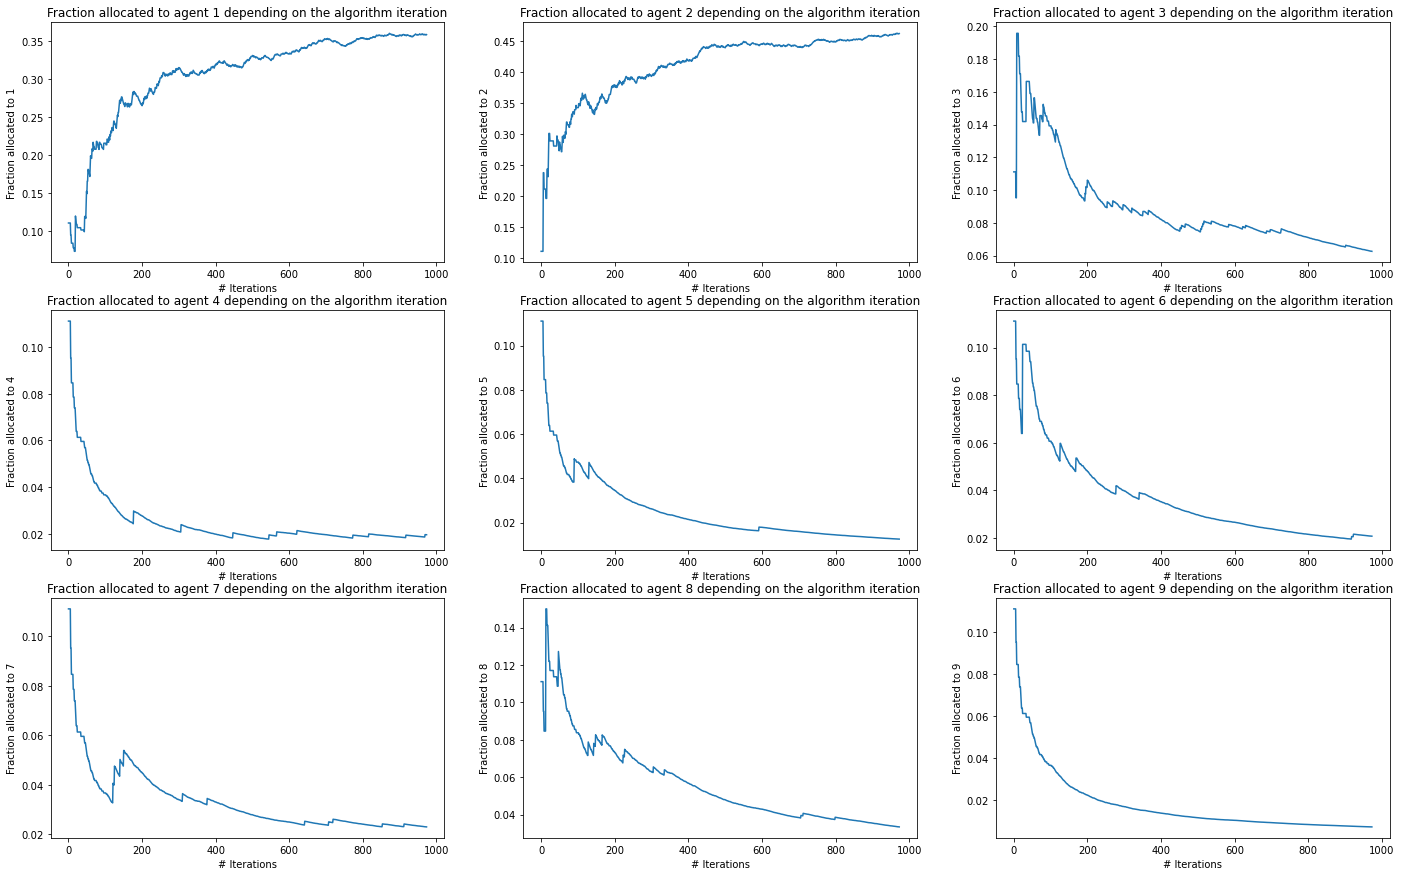

In [10]:
ps = sorted([np.random.random_sample() for x in range(9)])
ps.reverse()
plt.bar(x=range(1, len(ps)+1), height=ps)
plt.title('Probabilities to pass the test for each agent')

fig, axs = plt.subplots(3,3, figsize=(24,15))

X = [1/9 for n in range(9)]
fracs = simple_multi_armed_bandit(X, C=1, alpha=1, ps=ps)

for i in range(3):
    for j in range(3):
        axs[i, j].plot(range(fracs.shape[0]), fracs[:, i*3+j])
        axs[i, j].set_xlabel('# Iterations')
        axs[i, j].set_ylabel(f'Fraction allocated to {i*3+j+1}')
        axs[i, j].set_title(f'Fraction allocated to agent {i*3+j+1} depending on the algorithm iteration')

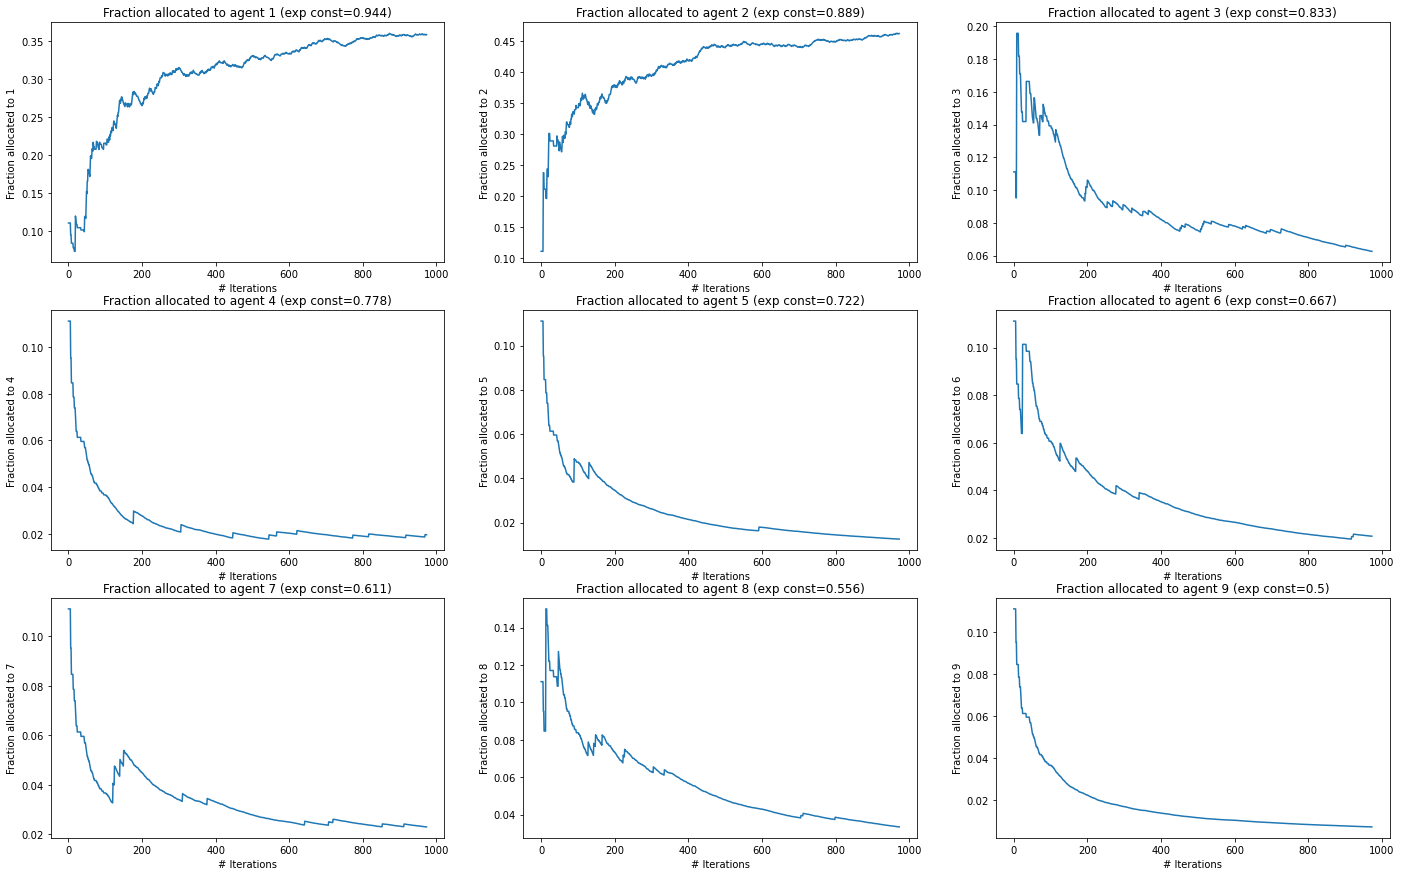

In [11]:
N = 9
agents = [ExpAvgAgent(50000, alpha=1/2+(N-i-1)/N*1/2) for i in range(N)]
X = [1/N for a in agents]
agent_multi_armed_bandit(data, agents, X, C=1, alpha=1)

fig, axs = plt.subplots(3,3, figsize=(24,15))
for i in range(3):
    for j in range(3):
        axs[i, j].plot(range(fracs.shape[0]), fracs[:, i*3+j])
        axs[i, j].set_xlabel('# Iterations')
        axs[i, j].set_ylabel(f'Fraction allocated to {i*3+j+1}')
        axs[i, j].set_title(f'Fraction allocated to agent {i*3+j+1} (exp const={np.round(agents[i*3+j].alpha, 3)})')

Text(0.5, 1.0, 'Estimated probability to pass the test for each agent ')

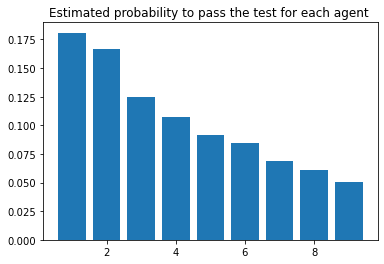

In [12]:
N = 9
agents = [ExpAvgAgent(50000, alpha=1/2+(N-i-1)/N*1/2) for i in range(N)]
ns = [0] * N
for n in range(973):
        ask, bid = data.iloc[n][['AskPrice', 'BidPrice']]
        for i, a in enumerate(agents):
            a.act(ask, bid)
            a.calc_pnl(bid)
            if test_pnl_increase(a):
                ns[i] += 1

ps = [n/973 for n in ns]
plt.bar(x=range(1, N+1), height=ps)
plt.title("Estimated probability to pass the test for each agent ")